<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/Face_Verification_using_VGGFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
!pip install mtcnn
!pip install keras_vggface keras_applications

In [3]:
!mkdir -p ~/.kaggle

In [79]:
!ls /content/drive/MyDrive/kaggle.json

/content/drive/MyDrive/kaggle.json


In [11]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle

In [80]:
!ls ~/.kaggle

kaggle.json


In [13]:
!chmod 600 /root/.kaggle/kaggle.json

In [81]:
!kaggle datasets list -s faces

ref                                              title                                      size  lastUpdated          downloadCount  
-----------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
kostastokis/simpsons-faces                       Simpsons Faces                            442MB  2018-09-28 17:38:04           4356  
soumikrakshit/anime-faces                        Anime Faces                               441MB  2019-05-16 10:38:47           3014  
selfishgene/youtube-faces-with-facial-keypoints  YouTube Faces With Facial Keypoints          0B  2020-05-25 22:53:33           5441  
andrewmvd/animal-faces                           Animal Faces                              696MB  2020-05-22 06:49:01            603  
dansbecker/5-celebrity-faces-dataset             5 Celebrity Faces Dataset                   5MB  2017-11-10 04:08:41           8426  
jessicali9530/celeba-dataset                     CelebF

In [16]:
!kaggle datasets download -d  dansbecker/5-celebrity-faces-dataset

 99% 5.00M/5.03M [00:00<00:00, 14.6MB/s]
100% 5.03M/5.03M [00:00<00:00, 14.4MB/s]


In [17]:
!ls

5-celebrity-faces-dataset.zip  drive  sample_data


In [82]:
!unzip 5-celebrity-faces-dataset.zip

Archive:  5-celebrity-faces-dataset.zip
replace data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  
  inflating: data/train/ben_afflek/httptrwebimgacstanetcxbdddmedias

In [83]:
!ls data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg

data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg


In [41]:
!ls data/train/ben_afflek/

httpcsvkmeuaeccjpg.jpg
httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
httpwwwallposterscomimagesPostersPFjpg.jpg
httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg
httpwwwhillsindcomstorebenjpg.jpg
httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg


In [84]:
!ls data/train/madonna/

httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg
httpimagegaladevcmseamadonnaprivatdetektivsquaretopsquarejpgv.jpg
httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg
httpmediavoguecomrwblondesdarkbrowsmadonnajpg.jpg
httpresizeparismatchladmediafrrffffffcentermiddleimgvarnewsstorageimagesparismatchpeopleazmadonnafreFRMadonnajpg.jpg
httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg
httpssmediacacheakpinimgcomxafafedebcbjpg.jpg
httpssmediacacheakpinimgcomxdcfdcfedfaedadjpg.jpg
httpssmediacacheakpinimgcomxfeebfdccajpg.jpg
httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg
httpssmediacacheakpinimgcomxffeabacaaejpg.jpg
httpssmediacacheakpinimgcomxffecfafddjpg.jpg
httpssvagalumecommadonnaimagesmadonnajpg.jpg
httpsuploadwikimediaorgwikipediacommonsMadonnathAnnualGoldenGlobesAwardscroppedjpg.jpg
httpsuploadwikimediaorgwikipediacommonsthumbaaMadonnaatthepremiereofIAmBecauseWeArejpgpxMadonnaatthepremiereofIA

In [49]:
!ls data/train/mindy_kaling/

httpgonetworthcomwpcontentuploadsthumbsjpg.jpg
httpgraphicsnytimescomimagesmagazinekalingkalingarticleInlinejpg.jpg
httpimagesnymagcomimagesdailymindykalingxjpg.jpg
httpmediaonsugarcomfilesbabaaaaaMindyInterviewxxxlargejpg.jpg
httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg
httpsamazonawscomkidzworldphotoimagesbccdddaaadgallerymindykalinggalleryjpg.jpg
httpsimagesnasslimagesamazoncomimagesIAQdwKvFILUXjpg.jpg
httpsimgbuzzfeedcombuzzfeedstaticstaticcampaignimageswebdradorableetsyitemsallmindykalingfansneedbigjpg.jpg
httpssmediacacheakpinimgcomxafaffbbbbdbcbdddjpg.jpg
httpssmediacacheakpinimgcomxbabafeacbaaacabffjpg.jpg
httpssmediacacheakpinimgcomxbbfcbdedfbfdbjpg.jpg
httpssmediacacheakpinimgcomxcccccddbbfedabjpg.jpg
httpssmediacacheakpinimgcomxccccdabeaadjpg.jpg
httpssmediacacheakpinimgcomxededbebccdajpg.jpg
httpssmediacacheakpinimgcomxeedccadejpg.jpg
httpsuploadwikimediaorgwikipediacommonsthumbMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpgpxMindyBKalingBPaleyFestBNewBYorkBBMi

In [85]:
from mtcnn.mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [86]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [87]:
image= cv2.imread('data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')

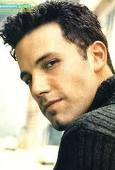

In [88]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [89]:
detector= MTCNN()

faces = detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [20, 35, 70, 88], 'confidence': 0.9996923208236694, 'keypoints': {'left_eye': (29, 73), 'right_eye': (54, 63), 'nose': (37, 90), 'mouth_left': (42, 108), 'mouth_right': (63, 100)}}


In [90]:
def create_bbox(image):
  faces= detector.detect_faces(image)
  bounding_box= faces[0]['box']
  keypoints=faces[0]['keypoints']

  cv2.rectangle(image,
                (bounding_box[0],bounding_box[1]),
                (bounding_box[0]+bounding_box[2],bounding_box[1]+bounding_box[3]),
                (0,155,255)
                )
  
  cv2.circle(image,(keypoints['left_eye']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['right_eye']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['nose']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['mouth_left']),2,(0,155,255),2)
  cv2.circle(image,(keypoints['mouth_right']),2,(0,155,255),2)

  return image

In [91]:
marked_image= create_bbox(image)

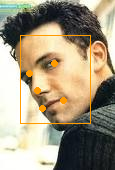

In [92]:
cv2_imshow(marked_image)

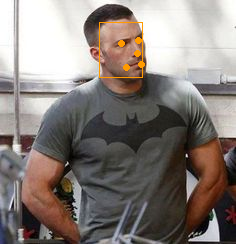

In [93]:
marked_image=create_bbox(cv2.imread('data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg'))
cv2_imshow(marked_image)

In [94]:
def extract_face(image,resize=(224,224)):
  image= cv2.imread(image)

  faces = detector.detect_faces(image)
  x1,y1,width,height = faces[0]['box']
  x2,y2 = x1 + width ,y1 + height
  face_boundary =  image[y1:y2 ,x1:x2]
  face_image = cv2.resize(face_boundary,resize)

  return face_image



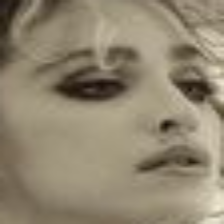

In [95]:
face_image = extract_face('data/train/madonna/httpssmediacacheakpinimgcomxfeebfdccajpg.jpg')
cv2_imshow(face_image)

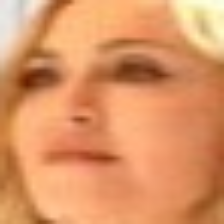

In [96]:
face_image = extract_face('data/train/madonna/httpsuploadwikimediaorgwikipediacommonsMadonnathAnnualGoldenGlobesAwardscroppedjpg.jpg')
cv2_imshow(face_image)

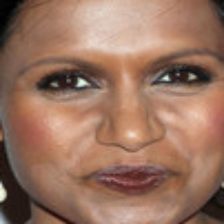

In [97]:
face_image = extract_face('data/train/mindy_kaling/httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg')
cv2_imshow(face_image)

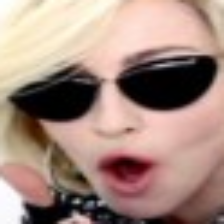

In [98]:
face_image = extract_face('data/train/madonna/httpwwwblackdogfilmscomwordpresswpcontentuploadsmadonnacelebrationxjpg.jpg')
cv2_imshow(face_image)

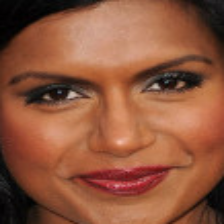

In [99]:
face_image = extract_face('data/train/mindy_kaling/httpsamazonawscomkidzworldphotoimagesbccdddaaadgallerymindykalinggalleryjpg.jpg')
cv2_imshow(face_image)

In [100]:
def get_embeddings(faces):
  face = np.asarray(faces,'float32')

  face = preprocess_input(face, version=2)
  model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

  return model.predict(face)

In [101]:
def get_similarity(faces):
  embeddings = get_embeddings(faces)

  score = cosine(embeddings[0],embeddings[1])

  if score <= 0.5:
    return "Face Matched", score
  
  return "Face Not Matched", score

In [102]:
!ls data/val/madonna

httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg
httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg
httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstearsjpg.jpg
httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg
httpecximagesamazoncomimagesIfmaBKWLACULSRjpg.jpg


In [103]:
faces = [extract_face(image) for image in ['data/train/madonna/httpwwwblackdogfilmscomwordpresswpcontentuploadsmadonnacelebrationxjpg.jpg',
                                          'data/val/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg']]
        



In [104]:
get_similarity(faces)

('Face Not Matched', 0.5417174696922302)

In [105]:
faces = [extract_face(image) for image in ['data/train/madonna/httpssmediacacheakpinimgcomxdcfdcfedfaedadjpg.jpg',
                                          'data/val/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg']]

In [106]:
get_similarity(faces)

('Face Matched', 0.3825380206108093)

In [112]:
!wget -O srivatsan.jpg https://miro.medium.com/max/3150/1*WOjjivNLywAqTZExOJXDug.png
!wget -O srivatsan1.jpg https://avatars1.githubusercontent.com/u/23365731?s=468&u=4688206775f7735260707f9f13e&
!wget -O modi1.jpg https://images.news18.com/ibnlive/uploads/2019/08/PM-MODI.jpg
!wget -O modi2.jpg https://pbs.twimg.com/media/EVNBCFUVAAA1tq5.jpg
!wget -O modi3.jpg https://images.livemint.com/img/2020/10/11/600x338/20201008203L_1602377733934_1602377748992.jpg
!wget -O amitabh.jpg https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTE1ODA0OTcxOTg4MDU5NjYx/raavan---uk-film-premiere-red-carpet-arrivals.jpg

--2020-11-19 03:46:58--  https://miro.medium.com/max/3150/1*WOjjivNLywAqTZExOJXDug.png
Resolving miro.medium.com (miro.medium.com)... 104.16.118.145, 104.16.120.145, 104.16.121.145, ...
Connecting to miro.medium.com (miro.medium.com)|104.16.118.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43291 (42K) [image/png]
Saving to: ‘srivatsan.jpg’

srivatsan.jpg       100%[===================>]  42.28K  --.-KB/s    in 0s      

2020-11-19 03:46:58 (126 MB/s) - ‘srivatsan.jpg’ saved [43291/43291]

--2020-11-19 03:46:58--  https://avatars1.githubusercontent.com/u/23365731?s=468
Resolving avatars1.githubusercontent.com (avatars1.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to avatars1.githubusercontent.com (avatars1.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36830 (36K) [image/jpeg]
Saving to: ‘srivatsan1.jpg’

srivatsan1.jpg      100%[===================

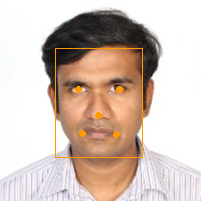

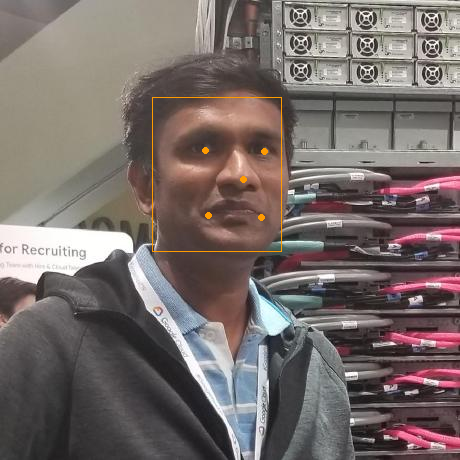

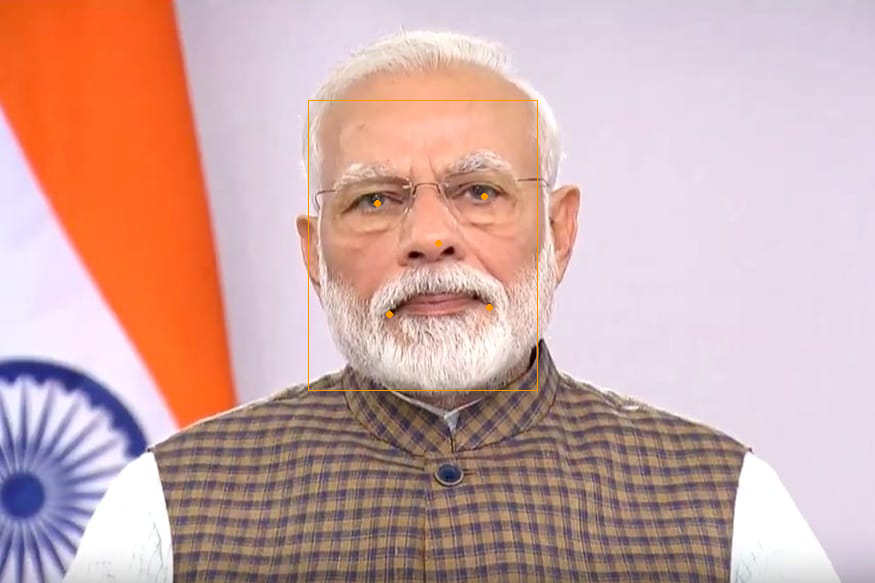

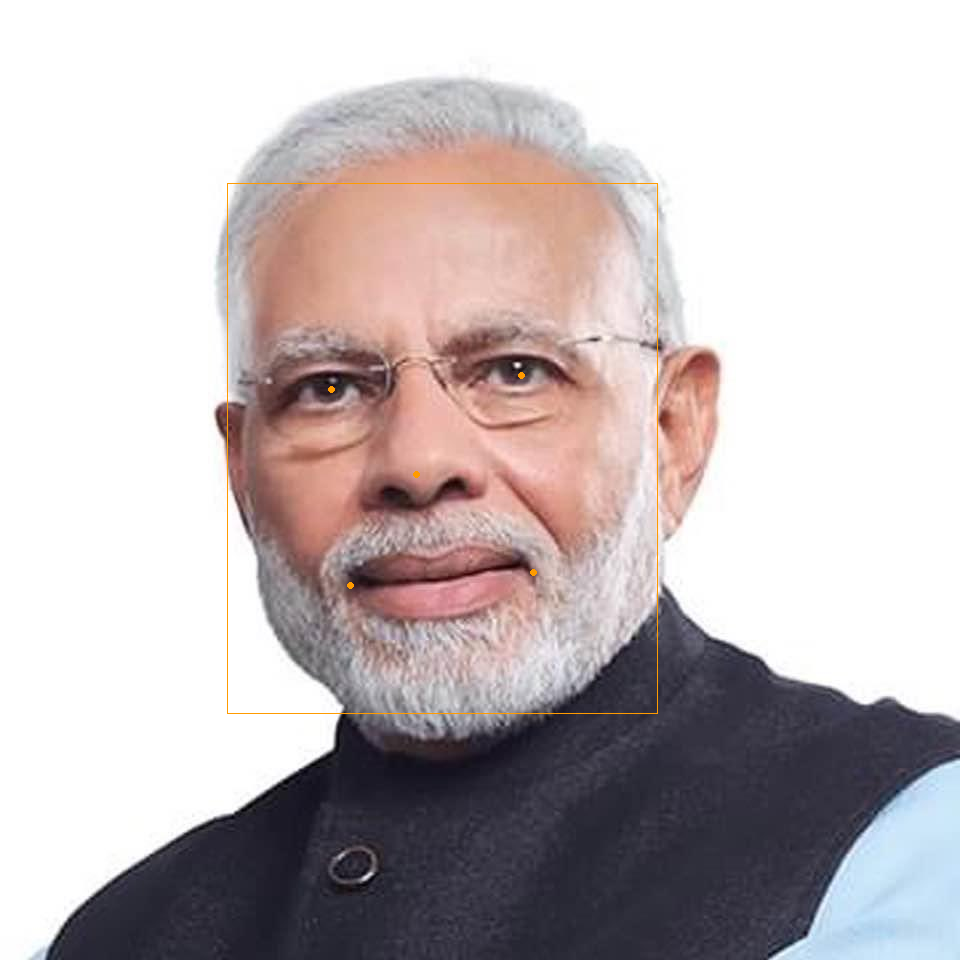

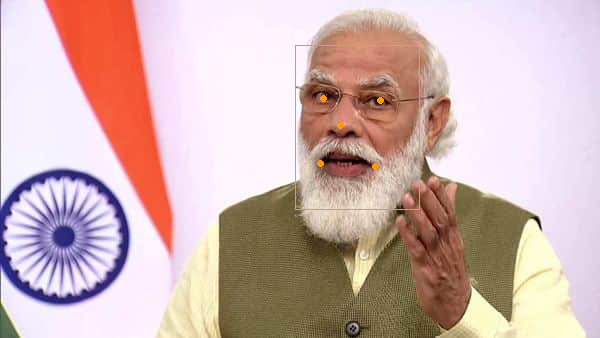

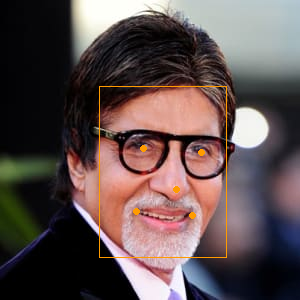

In [113]:
img_list=['srivatsan.jpg','srivatsan1.jpg','modi1.jpg','modi2.jpg','modi3.jpg','amitabh.jpg']

for image in img_list:
  face_image= create_bbox(cv2.imread(image))
  cv2_imshow(face_image)

In [117]:
faces = [extract_face(image) for image in ['srivatsan.jpg','srivatsan1.jpg']]
get_similarity(faces)        

('Face Matched', 0.35408782958984375)

In [118]:
faces = [extract_face(image) for image in ['srivatsan.jpg','modi1.jpg']]
get_similarity(faces)        

('Face Not Matched', 0.7263392508029938)

In [119]:
faces = [extract_face(image) for image in ['srivatsan.jpg','amitabh.jpg']]
get_similarity(faces)        

('Face Not Matched', 0.7346113324165344)

In [120]:
faces = [extract_face(image) for image in ['modi1.jpg','modi2.jpg']]
get_similarity(faces)        

('Face Matched', 0.2530045509338379)

In [ ]:
faces = [extract_face(image) for image in ['data/train/madonna/httpwwwblackdogfilmscomwordpresswpcontentuploadsmadonnacelebrationxjpg.jpg',
                                          'data/val/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg']]
        

